<a href="https://colab.research.google.com/github/jacr2006/tensorflow/blob/master/linear_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regresion lineal con Tensorflow

El propósito de esta regresion lineal es predecir la emision de CO2 de vehiculos livianos observando la cilindrada.
Disponemos del dataset "Fuel consumption ratings" disponible en:
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

Descarga del dataset en formato .csv

In [0]:
!wget -O FuelConsumption.csv 'https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/Original_1995-1999_Fuel_Consumption_Ratings_(2-cycle).csv'

--2019-08-18 04:13:22--  https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/Original_1995-1999_Fuel_Consumption_Ratings_(2-cycle).csv
Resolving www.nrcan.gc.ca (www.nrcan.gc.ca)... 198.103.48.143
Connecting to www.nrcan.gc.ca (www.nrcan.gc.ca)|198.103.48.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242704 (237K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>] 237.02K   870KB/s    in 0.3s    

2019-08-18 04:13:22 (870 KB/s) - ‘FuelConsumption.csv’ saved [242704/242704]



Importar las librerias necesarias

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

###Visualización y limpieza de datos
Lectura del .csv y asignacion a un dataframe para facilitar su visulizacion y manipulacion

In [0]:
df = pd.read_csv("FuelConsumption.csv", encoding='latin1')

Visualizacion de las primeras 5 filas del dataframe

In [0]:
df.head(5)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32,202
2,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34,193
3,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34,191
4,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26,251


La visualización anterior muestra las variables observadas del dataset y sus valores numericos. Pero la fila 1 no es numérica y generará errores cuando se realizen operacion numéricas. Se debe omitir ( o saltar en la lectura del csv)

In [0]:
df = pd.read_csv("FuelConsumption.csv", encoding='latin1', skiprows=[1])

Verificacion de la exitencia de datos nulos

In [0]:
df[['ENGINE SIZE']].isna().sum()

ENGINE SIZE    21
dtype: int64

Existen 21 valores nulos en la columna ENGINE SIZE que deben omitirse

In [0]:
df=df[~df['ENGINE SIZE'].isna()]

In [0]:
df[['CO2 EMISSIONS ']].isnull().sum()

CO2 EMISSIONS     0
dtype: int64

Para una visulizacion grafica de los datos usamos matplolib

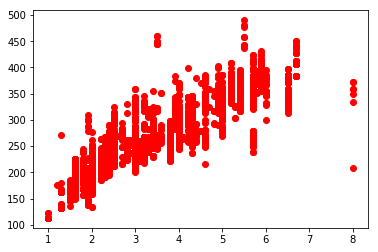

In [0]:
plt.plot(train_x, train_y, 'ro')
plt.show()

###Entrenamiento
Lectura y asignacion de las variables de interes que se usaran en la predicción

In [0]:
train_x = np.asanyarray(df[['ENGINE SIZE']])
train_y = np.asanyarray(df[['CO2 EMISSIONS ']])

La hipotesis usada para la predicción será una ecuacion lineal. Se espera obtener la recta que mejor se ajuste. La funcion de costos medirá el error de la hipotesis

In [0]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

La funcion de costos o perdida usada será la media de la diferencia entre el valor real y el inferido

In [0]:
loss = tf.reduce_mean(tf.square(y - train_y))

El algoritmo usado para hallar el minimo de la función de perdida será Gradiente Descendente con un coeficiente de aprendizaje de 0.05, en un principio

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [0]:
train = optimizer.minimize(loss)

Se crea una sesion y se inicializan las variables globales

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Se ejecutan 200 iteraciones y se imprime el valor de la funcion de perdida

In [0]:
loss_values = []
train_data = []
for step in range(200):
    _, b_val, a_val, loss_val = sess.run([train, b, a, loss])
    loss_values.append(loss_val)
    if step % 10 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 28822.312 20.0 30.2
10 1770.565 59.261467 53.241272
20 1572.6069 57.034145 61.87324
30 1422.3395 54.864376 70.28901
40 1308.2738 52.798847 78.30047
50 1221.6877 51.326912 84.009605
60 1155.9612 49.891914 89.57546
70 1106.0687 48.641663 94.42476
80 1068.1962 47.451473 99.04109
90 1039.4474 46.60332 102.33078
100 1017.6245 45.776455 105.53791
110 1001.05927 45.05604 108.33214
120 988.4847 44.42838 110.766624
130 978.93945 43.881523 112.887695
140 971.6937 43.405067 114.735695
150 966.19366 42.989956 116.34577
160 962.0185 42.594788 117.74855
170 958.84937 42.313183 118.97074
180 956.44366 42.038643 120.03559
190 954.6177 41.799446 120.96334


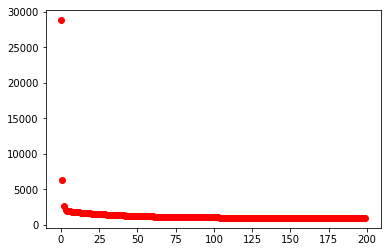

In [0]:
plt.plot(loss_values, 'ro')

###Inferencia
Para un vehiculo con un "ENGINE SIZE" de 2.0, predeciremos la  "CO2 EMISSIONS"

In [0]:
y = a_val * (2.0) + b_val
print("CO2 EMISSIONS:{}".format(y))

CO2 EMISSIONS:204.91698455810547


In [0]:
sess.close()

Para mejorar la perdida de la hipotesis, es posible:

*   usar regularizacion 
*   usar "polynomial features"
